# Answers

## 1. Parent particle rest frame

**Focus on $\nu_\mu$ production in the parent particle rest frame.**

1.1 Write a function which calculates the energy of particle c in a generic 2-body decay $a \rightarrow b + c$ with masses $m_a, m_b, m_c.$

In [1]:
def Energy_c(m_a, m_b, m_c):
    return (m_a**2-m_b**2+m_c**2)/(2*m_a)

1.2 Use it to calculate the Energy of the $\nu_\mu$ in both cases.

In [2]:
m_pi = 140. # MeV
m_K  = 490. # MeV
m_mu = 105. # MeV
m_nu = 0.   # MeV

In [3]:
energy_nu_1 = Energy_c(m_pi, m_mu, m_nu)
energy_nu_2 = Energy_c(m_K, m_mu, m_nu)

print('energy nu from pi:', energy_nu_1, 'MeV')
print('energy nu from K: ', energy_nu_2, 'MeV')

energy nu from pi: 30.625 MeV
energy nu from K:  233.75 MeV


1.3 Write a function to calculate the 3-momentum of a generic particle $c$ in the same 2-body decay with angle $\theta$ w.r.t. the $z$-axis and azimuthal angle $\phi$.

In [4]:
import numpy as np 

def Direction(theta, phi):
    return np.array([np.sin(theta) * np.sin(phi), np.sin(theta) * np.cos(phi), np.cos(theta)])

def Momentum_c(m_a, m_b, m_c, theta, phi):
    pc = np.sqrt(Energy_c(m_a, m_b, m_c)**2 - m_c**2)
    return pc * Direction(theta, phi)

1.4 Use the functions above to calculate the 3-momentum of $\nu$ in both decays, assuming the decay happens on the plane $x = 0$, with a $\theta$ of your choice.

In [5]:
theta = np.pi/6.

momentum_nu_1 = Momentum_c(m_pi, m_mu, m_nu, theta, 0.)
momentum_nu_2 = Momentum_c(m_K, m_mu, m_nu, theta, 0.)

print('momentum nu from pi:', momentum_nu_1, 'MeV')
print('momentum nu from K: ', momentum_nu_2, 'MeV')

momentum nu from pi: [ 0.         15.3125     26.52202799] MeV
momentum nu from K:  [  0.         116.875      202.43343813] MeV


1.5 Write a function that takes the energy and 3-momentum of a particle $c$ in input and returns the 4-momentum.

In [6]:
def FMomentum_c(energy,momentum):
    return np.insert(momentum,0,energy)

fmomentum_nu_1 = FMomentum_c(energy_nu_1,momentum_nu_1)
fmomentum_nu_2 = FMomentum_c(energy_nu_2,momentum_nu_2)

print('4 - momentum nu from pi:', fmomentum_nu_1, 'MeV')
print('4 - momentum nu from K: ', fmomentum_nu_2, 'MeV')


4 - momentum nu from pi: [30.625       0.         15.3125     26.52202799] MeV
4 - momentum nu from K:  [233.75         0.         116.875      202.43343813] MeV


## 2. Lab frame

**Assume the $\pi$ and $K$ are travelling in the lab frame with Energy 1GeV in direction $z$.**

2.1 Write a function which returns the value of $\beta = v/c$ in the lab frame, given the mass and energy of the particle.

In [7]:
energy_pi_lab = 500. # MeV
energy_K_lab = 500. # MeV

def Beta(m_c, energy_c_lab):
    p_c_lab = np.sqrt(energy_c_lab**2-m_c**2)
    return p_c_lab/energy_c_lab

2.2 Write a function which allows you to boost a 4-momentum along the positive $z$-axis.

In [8]:
def Boost_along_z(fmomentum, beta):
    gamma = 1./np.sqrt(1-beta**2)
    boost_E = gamma * fmomentum[0] - beta * gamma * fmomentum[3]
    boost_x = fmomentum[1]
    boost_y = fmomentum[2]
    boost_z = gamma * fmomentum[3] - beta * gamma * fmomentum[0]
    return np.array([boost_E, boost_x, boost_y, boost_z])

2.3  Calculate the value of $\beta$ of the lab frame as seen by the rest frame using 2.1.

In [9]:
beta_lab_1 = -Beta(m_pi,energy_pi_lab)
beta_lab_2 = -Beta(m_K,energy_K_lab)

print('beta of lab from pi:', beta_lab_1)
print('beta of lab from K :', beta_lab_2)

beta of lab from pi: -0.96
beta of lab from K : -0.198997487421324


2.4 Calculate the 4-momenta of the neutrinos boosted into the lab frame, assuming 1.5.

In [10]:
fmomentum_nu_1_lab = Boost_along_z(fmomentum_nu_1, beta_lab_1)
fmomentum_nu_2_lab = Boost_along_z(fmomentum_nu_2, beta_lab_2)

print('4-momentum of nu from pi in the lab:', fmomentum_nu_1_lab)
print('4-momentum of nu from K in the lab :', fmomentum_nu_2_lab)

4-momentum of nu from pi in the lab: [200.3076674    0.          15.3125     199.72152854]
4-momentum of nu from K in the lab : [279.62627098   0.         116.875      254.02969471]


In [11]:
#quick check: 
print(fmomentum_nu_1_lab[0]**2-fmomentum_nu_1_lab[2]**2-fmomentum_nu_1_lab[3]**2)
print(fmomentum_nu_2_lab[0]**2-fmomentum_nu_2_lab[2]**2-fmomentum_nu_2_lab[3]**2)

-7.275957614183426e-12
-2.1827872842550278e-11


#### The mass is a relativistic invariant

2.5 What are the maximum and minimum values of the energy the product neutrino can have, in the lab frame? 

In [12]:
momentum_nu1_max = Momentum_c(m_pi, m_mu, m_nu, 0., 0.)
momentum_nu2_max = Momentum_c(m_K, m_mu, m_nu, 0., 0.)

fmomentum_nu1_max = FMomentum_c(energy_nu_1,momentum_nu1_max)
fmomentum_nu2_max = FMomentum_c(energy_nu_2,momentum_nu2_max)

fmomentum_nu1max_lab = Boost_along_z(fmomentum_nu1_max, beta_lab_1)
fmomentum_nu2max_lab = Boost_along_z(fmomentum_nu2_max, beta_lab_2)

print('Maximum energy of nu from pi in the lab:', fmomentum_nu1max_lab[0], 'MeV')
print('Maximum energy of nu from K in the lab :', fmomentum_nu2max_lab[0], 'MeV')

Maximum energy of nu from pi in the lab: 214.375 MeV
Maximum energy of nu from K in the lab : 285.9853700864638 MeV


In [13]:
momentum_nu1_min = Momentum_c(m_pi, m_mu, m_nu, np.pi, 0.)
momentum_nu2_min = Momentum_c(m_K, m_mu, m_nu, np.pi, 0.)

fmomentum_nu1_min = FMomentum_c(energy_nu_1,momentum_nu1_min)
fmomentum_nu2_min = FMomentum_c(energy_nu_2,momentum_nu2_min)

fmomentum_nu1min_lab = Boost_along_z(fmomentum_nu1_min, beta_lab_1)
fmomentum_nu2min_lab = Boost_along_z(fmomentum_nu2_min, beta_lab_2)

print('Maximum energy of nu from pi in the lab:', fmomentum_nu1min_lab[0], 'MeV')
print('Maximum energy of nu from K in the lab :', fmomentum_nu2min_lab[0], 'MeV')

Maximum energy of nu from pi in the lab: 4.374999999999986 MeV
Maximum energy of nu from K in the lab : 191.05544624006683 MeV


## 3. Energy Distributions

**Let's generalise what you have found for different angles $\theta$. Let rf refer to the rest frame and lf to the lab frame. What are the allowed values of $\theta_{rf}$ in the rest frame in this decay?**

The thetas in the rest frame are random as it is a 2-body decay.

3.1 Guided exercise: create a plot of the distribution of energies in the lab frame of the product neutrinos as a function of $\theta$, assuming the parent particle has energy 1GeV in the lab frame. Also look at the histogram of the energies.

a) You can approach this problem in several ways; a natural one is to pick the angle $\theta$ as a random variable many times, until you have a clear picture of the distribution. To do this import `numpy` and use `np.random.rand()` : `theta = np.random.rand()` in a `while` or `for` loop, appending each value to a list. Try running, and make sure you understand, the below code before pressing on. 

0.9058464898775953
1.8689784349648317


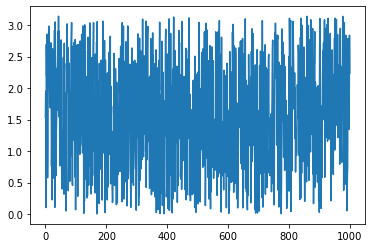

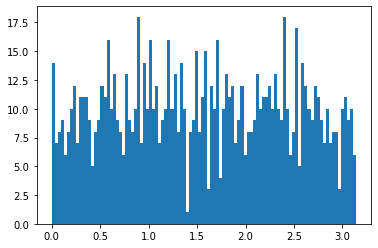

In [14]:
import numpy as np
import matplotlib.pyplot as plt
## check what the funciton rand() does:

# np.random.rand() will return a random number between 0 and 1
print(np.random.rand())

# adding an amplitude A in front will return a random number between 0 and A, e.g.: 
print(np.pi * np.random.rand())
# returns a random number between 0 and PI

## create an empty list to store your random numbers in:
random = []

## run a for loop which creates random numbers with A = np.pi and appends each new value to the list above
for idx in range(1000):
    random.append(np.pi * np.random.rand())

## plot the output list
import matplotlib.pyplot as plt

plt.plot(random)
plt.show()

## make a histogram of the list

# the function plt.hist() will make a histogram of the argument; you may select the number of bins
plt.hist(random, bins = 100)
plt.show()
# as expected, the histogram looks like a flat distribution

b) Write a loop which will sample $\theta$ in its range with `rand()`, saving each value of $\theta$ and the associated value of `energy_nu_lab` for both decays.

In [15]:
thetas_1   = []
thetas_2   = []
energies_1 = []
energies_2 = []
n_events   = 1000

for idx in range(n_events):
    theta = np.pi * np.random.rand() # - np.pi
    en_nu_rf_1 = Energy_c(m_pi, m_mu, m_nu)
    p_nu_rf_1  = Momentum_c(m_pi, m_mu, m_nu, theta, 0.)
    fmomentum_nu_1_lab = Boost_along_z(FMomentum_c(en_nu_rf_1, p_nu_rf_1), beta_lab_1)
    energies_1.append(fmomentum_nu_1_lab[0])
    thetas_1.append(theta)
    
for idx in range(n_events):
    theta = np.pi * np.random.rand() # - np.pi
    en_nu_rf_2 = Energy_c(m_K, m_mu, m_nu)
    p_nu_rf_2  = Momentum_c(m_K, m_mu, m_nu, theta, 0.)
    fmomentum_nu_2_lab = Boost_along_z(FMomentum_c(en_nu_rf_2, p_nu_rf_2), beta_lab_2)
    energies_2.append(fmomentum_nu_2_lab[0])
    thetas_2.append(theta)

c) Create plots for both decays of `energy_nu_lab` as a function of $\theta$. What function is it? 

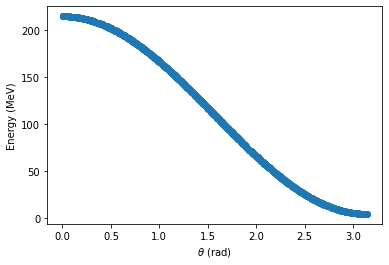

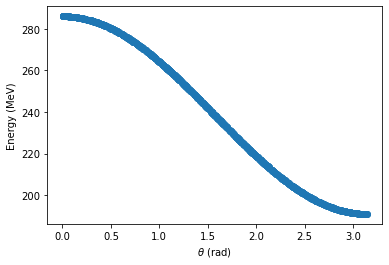

In [16]:
plt.scatter(thetas_1,energies_1)
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Energy (MeV)')
plt.show()

plt.scatter(thetas_2,energies_2)
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel('Energy (MeV)')
plt.show()

d) Create plots for both decays of the histograms of the `energy_nu_lab`.

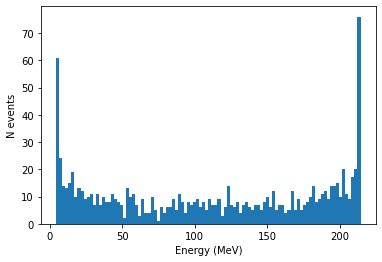

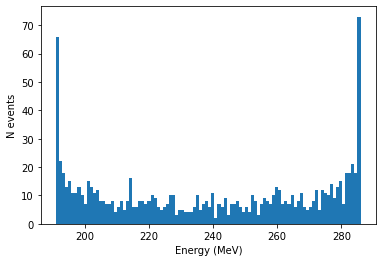

In [17]:
plt.hist(energies_1, bins = 100)
plt.ylabel('N events')
plt.xlabel('Energy (MeV)')
plt.show()

plt.hist(energies_2, bins = 100)
plt.ylabel('N events')
plt.xlabel('Energy (MeV)')
plt.show()

3.2 Guided exercise: create a plot of the distribution histogram of energies in the lab frame of the product neutrinos, assuming the parent particle has a log-normal momentum distribution in the lab frame. We can assume the momenta of the $\pi$ and $K$ beams follow the log-normal distribution, and that there are roughly 10 more $\pi$ decays than $K$ decays in the beam. 

a) Familiarise yourself with the log-normal distribution function.

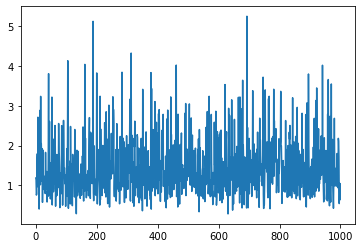

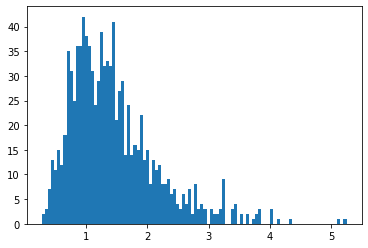

In [18]:
def generate_log_normal(x_min,x_max,mu,sigma):
    x = np.random.lognormal(mu,sigma)
    if x <= x_max and x >= x_min:
        return x
    else:
        return generate_log_normal(x_min,x_max,mu,sigma)


# use these values of sigma and mu throughout
sigma = 0.5
mu = 0.25

# recover the min and max values of the energy from your calculations above
x_min = 0. #GeV
x_max = 6. #GeV

# set up the run
distrib_x = []
n_samples = 1000

# pick values from the distribution
for idx in range(n_samples):
    distrib_x.append(generate_log_normal(x_min,x_max,mu,sigma))
    
plt.plot(distrib_x)
plt.show()
plt.close()

plt.hist(distrib_x, bins = 100)
plt.show()

b) Repeat exercise in 3.1, now drawing the energy of the parent particles from the distribution at each iteration in the loop, and saving the values of `energy_nu_lab` each time. Remember to still keep the value of $\theta$ random! Finally, plot the histogram of the sum of the energies of the product neutrinos.

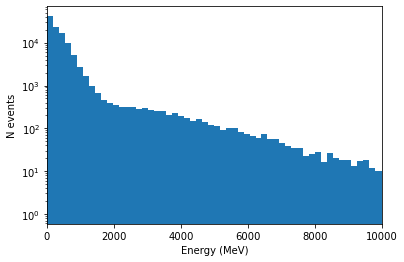

In [19]:
n_events_pi = 100000

ens_1 = []
ths_1 = []

for idx in range(n_events_pi):
    theta      = np.pi * np.random.rand() # - np.pi
    en_pi_lab  = np.sqrt(m_pi**2+1.e6*generate_log_normal(x_min,x_max,mu,sigma)**2)
    b_lab_1    = -Beta(m_pi,en_pi_lab)
    en_nu_rf_1 = Energy_c(m_pi, m_mu, m_nu)
    p_nu_rf_1  = Momentum_c(m_pi, m_mu, m_nu, theta, 0.)
    fmomentum_nu_1_lab = Boost_along_z(FMomentum_c(en_nu_rf_1, p_nu_rf_1), b_lab_1)
    ens_1.append(fmomentum_nu_1_lab[0])
    ths_1.append(theta)
    
ens_2 = []
ths_2 = []

n_events_K = int(n_events_pi / 10)

for idx in range(n_events_K):
    theta      = np.pi * np.random.rand() # - np.pi
    en_K_lab   = np.sqrt(m_K**2+1.e6*generate_log_normal(x_min,x_max,mu,sigma)**2)
    b_lab_2    = -Beta(m_pi,en_K_lab)
    en_nu_rf_2 = Energy_c(m_K, m_mu, m_nu)
    p_nu_rf_2  = Momentum_c(m_K, m_mu, m_nu, theta, 0.)
    fmomentum_nu_2_lab = Boost_along_z(FMomentum_c(en_nu_rf_2, p_nu_rf_2), b_lab_2)
    ens_2.append(fmomentum_nu_2_lab[0])
    ths_2.append(theta)

ens_all = ens_1 + ens_2

#plt.hist(ens_2, bins = 100, label = 'nus from Kaon')
#plt.hist(ens_1, bins = 100, label = 'nus from Pion')
plt.hist(ens_all, bins = 100, label = 'product nus energy')
plt.yscale('log')
plt.xlim(0, 10000)
plt.ylabel('N events')
plt.xlabel('Energy (MeV)')
plt.show()

c) You run the experiment and you get the histogram in b), which includes all the product neutrinos. How could you differentiate between the $\pi$ neutrinos and the $K$ neutrinos? Replot the histogram for b) separating the $K$ and $\pi$ neutrinos explicitly, and point out the differences.

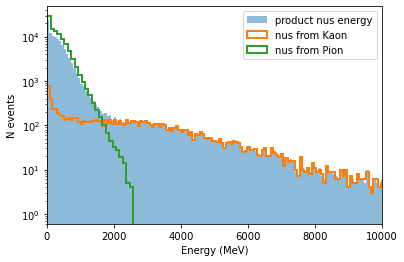

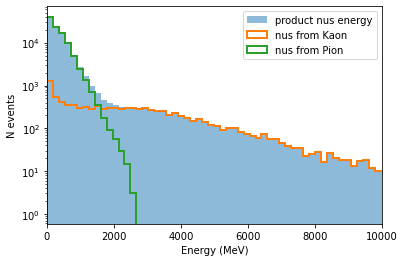

In [20]:
plt.hist(ens_all, bins = 250, label = 'product nus energy', alpha = 0.5)
plt.hist(ens_2, bins = 250, label = 'nus from Kaon', histtype = 'step', linewidth=2)
plt.hist(ens_1, bins = 25, label = 'nus from Pion', histtype = 'step', linewidth=2)
plt.yscale('log')
plt.xlim(0, 10000)
plt.ylabel('N events')
plt.xlabel('Energy (MeV)')
plt.legend()
plt.show()

### or

range_hist = [min(ens_all), max(ens_all)] 

plt.hist(ens_all, bins = 100, range = range_hist, label = 'product nus energy', alpha = 0.5)
plt.hist(ens_2, bins = 100, range = range_hist, label = 'nus from Kaon', histtype = 'step', linewidth=2)
plt.hist(ens_1, bins = 100, range = range_hist, label = 'nus from Pion', histtype = 'step', linewidth=2)
plt.yscale('log')
plt.xlim(0, 10000)
plt.ylabel('N events')
plt.xlabel('Energy (MeV)')
plt.legend()
plt.show()